In [2]:
# Importação de Bibliotecas
import numpy as np
import math
import pandas as pd
import scipy.spatial
import matplotlib.pyplot as plt
from sklearn import datasets
from collections import Counter
from sklearn.model_selection import train_test_split

In [3]:
class KNN:
    def __init__(self, k, h):
        self.h = h
        self.k = k

    def train(self, x, y):
        self.x_train = x
        self.y_train = y

    def predict(self, x_test):
        y = []
        if x_test.ndim == 1:
            num_linhas = 1
        else:
            num_linhas = x_test.shape[0]
        for i in range (num_linhas):
            d = []
            resp = []
            for j in range(len(self.x_train)):
                distance = np.sqrt(np.sum((x_test - self.x_train[j]) ** 2))
                if distance < self.h:
                    d.append([distance, j])
            d.sort()
            d = d[0:self.k]
            for d, j in d:
                resp.append(self.y_train[j])
            if len(resp) > 0:
                y_aux = Counter(resp).most_common(1)[0][0]
            else:
                y_aux = 'nan'
            y.append(y_aux)
        return y
            

# 2. Sonar

In [24]:
# Carregar o conjunto de dados Sonar
sonar = pd.read_csv('sonar.all-data.csv', header=None)
x = sonar.iloc[:, 0:60]
x = x.values
y = sonar.iloc[:, 60]
y = y.values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.9, random_state=42)

In [25]:
x

array([[0.02  , 0.0371, 0.0428, ..., 0.0084, 0.009 , 0.0032],
       [0.0453, 0.0523, 0.0843, ..., 0.0049, 0.0052, 0.0044],
       [0.0262, 0.0582, 0.1099, ..., 0.0164, 0.0095, 0.0078],
       ...,
       [0.0522, 0.0437, 0.018 , ..., 0.0138, 0.0077, 0.0031],
       [0.0303, 0.0353, 0.049 , ..., 0.0079, 0.0036, 0.0048],
       [0.026 , 0.0363, 0.0136, ..., 0.0036, 0.0061, 0.0115]])

In [26]:
y

array(['R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M

In [27]:
asw = pd.DataFrame()
df = pd.DataFrame()
ks = [2, 5, 10, 15]
hs = np.arange(0.1, 3, 0.1)
k_array = []
h_array = []
acc_array = []
out_array = []
wrong_array = []

for k in ks:
    for h in hs:
        knn = KNN(k, h)
        knn.train(x_train, y_train)
        count = 0
        count2 = 0
        for i in range(len(x_test)):
            resp = knn.predict(x_test[i])
            if isinstance(resp[0], np.int32):
                if resp[0] == y_test[i]:
                    count = count + 1
                else:
                    count2 = count2 + 1
        out = round(count2 / len(x_test) * 100, 2)
        acc = round(count / len(x_test) * 100, 2)
        wrong = 100 - acc - out
        k_array.append(k)
        h_array.append(h)
        acc_array.append(acc)
        out_array.append(out)
        wrong_array.append(wrong)

dados = {
    "k": k_array,
    "h": h_array,
    "acc": acc_array,
    "out": out_array,
    "wrong": wrong_array
}

asw = pd.DataFrame(dados)

In [28]:
asw

,k,h,acc,out,wrong
0,2,0.1,0.0,0.0,100.0
1,2,0.2,0.0,0.0,100.0
2,2,0.3,0.0,0.0,100.0
3,2,0.4,0.0,0.0,100.0
4,2,0.5,0.0,0.0,100.0
...,...,...,...,...,...
111,15,2.5,0.0,0.0,100.0
112,15,2.6,0.0,0.0,100.0
113,15,2.7,0.0,0.0,100.0
114,15,2.8,0.0,0.0,100.0


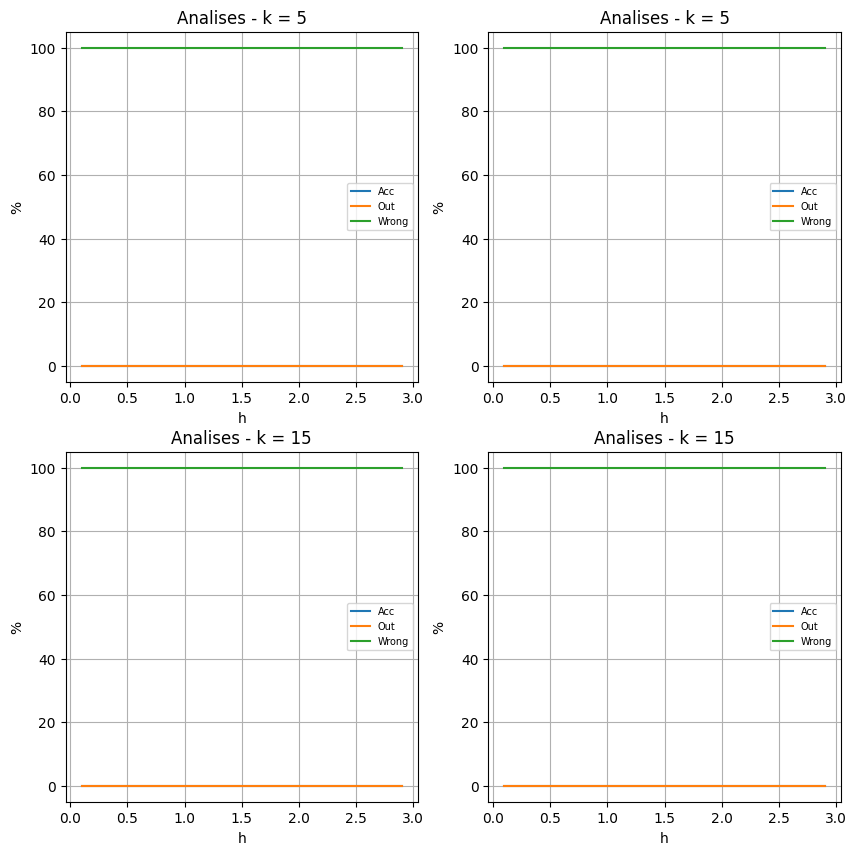

In [20]:
fig, axs = plt.subplots(2, 2)
fig.set_figheight(10)
fig.set_figwidth(10)

for i in range(2):
    for j in range(2):
        df = asw[asw['k'] == ks[2*i + j]]

        axs[i, j].plot(df['h'], df['acc'], label = 'Acc')
        axs[i, j].plot(df['h'], df['out'], label = 'Out')
        axs[i, j].plot(df['h'], df['wrong'], label = 'Wrong')

        # Adicionar rotulos, titulo e legenda
        axs[i, j].set_xlabel('h')
        axs[i, j].set_ylabel('%')
        axs[i, j].set_title(f'Analises - k = {ks[2*i+1]}')
        axs[i, j].legend(fontsize = 7)
        axs[i, j].grid()

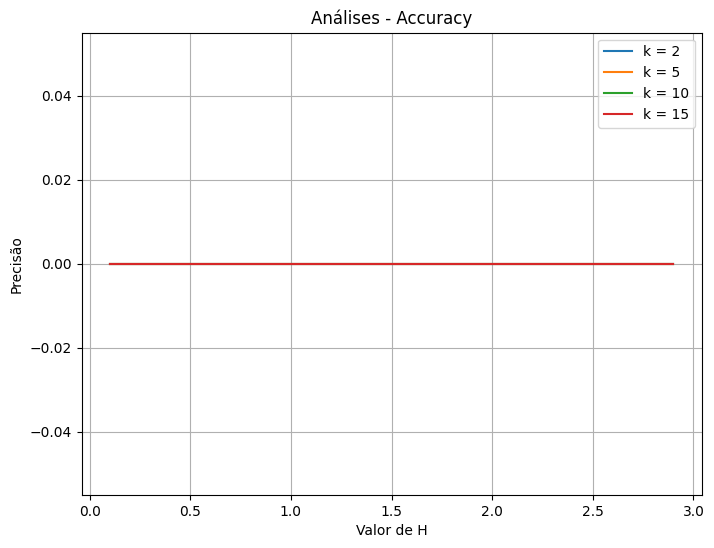

In [21]:
df0 = asw[asw['k'] == ks[0]]
df1 = asw[asw['k'] == ks[1]]
df2 = asw[asw['k'] == ks[2]]
df3 = asw[asw['k'] == ks[3]]

# Plotando as duas retas
plt.figure(figsize = (8, 6))
plt.plot(df0['h'], df0['acc'], label = 'k = 2')
plt.plot(df1['h'], df1['acc'], label = 'k = 5')
plt.plot(df2['h'], df2['acc'], label = 'k = 10')
plt.plot(df3['h'], df3['acc'], label = 'k = 15')

# Adicionando titulos e legenda ao grafico
plt.xlabel('Valor de H')
plt.ylabel('Precisão')
plt.title('Análises - Accuracy')
plt.legend()

# Exibição do Gráfico
plt.grid(True)
plt.show()

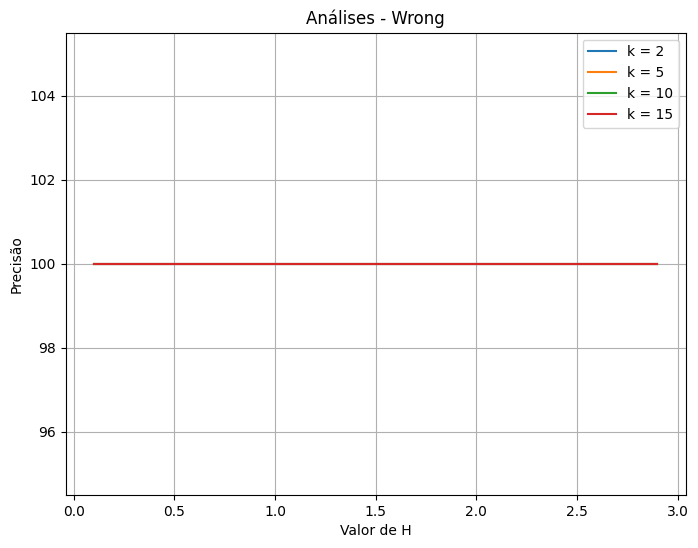

In [22]:
# Plotando as duas retas
plt.figure(figsize = (8, 6))
plt.plot(df0['h'], df0['wrong'], label = 'k = 2')
plt.plot(df1['h'], df1['wrong'], label = 'k = 5')
plt.plot(df2['h'], df2['wrong'], label = 'k = 10')
plt.plot(df3['h'], df3['wrong'], label = 'k = 15')

# Adicionando titulos e legenda ao grafico
plt.xlabel('Valor de H')
plt.ylabel('Precisão')
plt.title('Análises - Wrong')
plt.legend()

# Exibição do Gráfico
plt.grid(True)
plt.show()

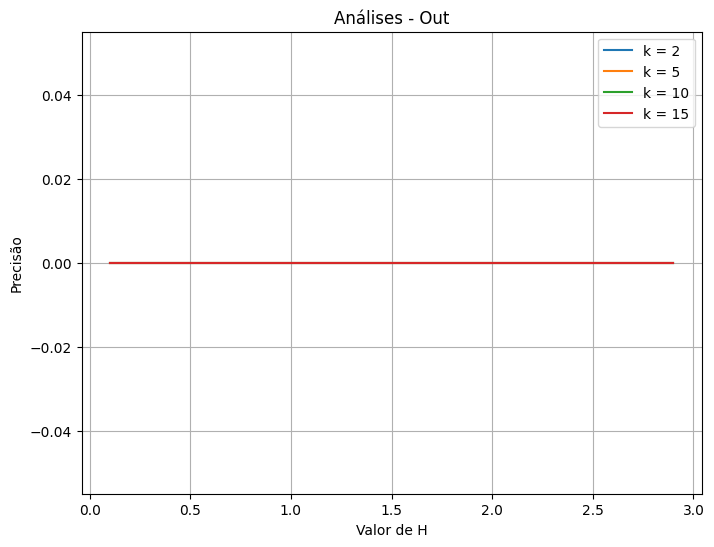

In [23]:
# Plotando as duas retas
plt.figure(figsize = (8, 6))
plt.plot(df0['h'], df0['out'], label = 'k = 2')
plt.plot(df1['h'], df1['out'], label = 'k = 5')
plt.plot(df2['h'], df2['out'], label = 'k = 10')
plt.plot(df3['h'], df3['out'], label = 'k = 15')

# Adicionando titulos e legenda ao grafico
plt.xlabel('Valor de H')
plt.ylabel('Precisão')
plt.title('Análises - Out')
plt.legend()

# Exibição do Gráfico
plt.grid(True)
plt.show()